# <center> RMSD postfiltering </center>
<center>=================================================================================</center>

## Info about notebook
Assessment of the simulations by RMSD to starting/equilibration structure  


In [1]:
import sys,os,json,time, gzip,time
import numpy as np
import mdtraj as md

from matplotlib import pyplot as plt


In [2]:
def get_rmsd(pdb,path):
    ''' '''
#     path = f'simulations_new/{pdb}/'
    
    # load in equilibrated protein system
    equil = md.load(f'{path}/{pdb}/equil_2_{pdb}.pdb')
    # remove all  water keep only protein as this is only saved in traj
    protein = equil.atom_slice(equil.top.select('protein'))
    CA = equil.top.select('name CA')
    traj = md.load_xtc(f'{path}/{pdb}/{pdb}_trajectory.xtc',top=protein, stride=5)
    
    rmsd = md.rmsd(traj, protein, atom_indices = CA)
    max_rmsd = round(float(np.max(rmsd)),4)
    
    return max_rmsd 

# #     if max_rmsd > 0.45:

In [24]:
# make json
# cath4.2 all 
with open('../data/CATH4.2_ALL_STATUS.json', 'r') as f:
    all_cath42 = json.load(f)

with open('../simulations_new/simulations_RMSD_cleaned_by_mahers_script/finished','r') as f:
    pdbs = f.readlines()
pdbs = [pdb.strip() for pdb in pdbs]
new_pdbs = {pdb:all_cath42[pdb] for pdb in all_cath42 if  pdb in pdbs}

with open('../simulations_new/simulations_nan_cleaned_by_mahers_script/finished','r') as f:
    pdbs = f.readlines()
pdbs = [pdb.strip() for pdb in pdbs]
nan_new_pdbs = {pdb:all_cath42[pdb] for pdb in all_cath42 if  pdb in pdbs}

new_pdbs.update(nan_new_pdbs)
with open('../scripts/CATH4.2_ALL_STATUS_mahers_clean.json', 'w') as f:
    json.dump(new_pdbs,f)

{'3icu': {'split': 'train', 'prefilter reasons': [], 'cath_nodes': ['3.50.30'], 'size': 314, 'chains': 1, 'method': ['X-RAY DIFFRACTION'], 'rmsd NMR': nan, 'resolution': 2.1, 'prefilter status': 'kept', 'simulation status': 'Finished', 'unsuccessfull reason': 'N.A.', 'simulation max RMSD': 0.2985}, '2mca': {'split': 'train', 'prefilter reasons': [], 'cath_nodes': ['2.60.40'], 'size': 103, 'chains': 1, 'method': ['SOLUTION NMR'], 'rmsd NMR': 0.38, 'resolution': nan, 'prefilter status': 'kept', 'simulation status': 'Finished', 'unsuccessfull reason': 'N.A.', 'simulation max RMSD': 0.4035}, '1nyo': {'split': 'train', 'prefilter reasons': [], 'cath_nodes': ['2.30.180'], 'size': 163, 'chains': 1, 'method': ['SOLUTION NMR'], 'rmsd NMR': 0.18, 'resolution': nan, 'prefilter status': 'kept', 'simulation status': 'Finished', 'unsuccessfull reason': 'N.A.', 'simulation max RMSD': 0.1219}, '2eqo': {'split': 'train', 'prefilter reasons': [], 'cath_nodes': ['1.10.418'], 'size': 140, 'chains': 1, 'me

In [6]:
all_cath42['2rcz']

{'split': 'train',
 'prefilter reasons': [],
 'cath_nodes': ['2.30.42'],
 'size': 263,
 'chains': 2,
 'method': ['X-RAY DIFFRACTION'],
 'rmsd NMR': nan,
 'resolution': 1.7,
 'prefilter status': 'kept',
 'simulation status': 'Finished',
 'unsuccessfull reason': 'N.A.',
 'simulation max RMSD': 4.4575}

In [37]:
get_rmsd(test, path)

0.3996

In [6]:
# list of pdbs
with open('../simulations_new/simulations_stability_mahers_clean/comparison_clean_scripts.dat','r') as f:
    pdbs = f.readlines()
pdbs = [pdb.strip() for pdb in pdbs]
print(pdbs)

['171l', '1a2p', '1bf4', '1bpi', '1cey', '1csp', '1fkb', '1fxa', '1hfz', '1hz6', '1iob', '1l63', '1lmb', '1pga', '1rex', '1shf', '1shg', '219l', '2ci2', '2lzm']


In [7]:
list_own = []
list_mahers = []
list_diff = []
for pdb in pdbs:
    path_own = '../simulations_new/simulations_stability/'
    path_mahers = '../simulations_new/simulations_stability_mahers_clean/'
    rmsd_own = get_rmsd(pdb, path_own)
    list_own.append(rmsd_own )
    rmsd_mahers = get_rmsd(pdb,path_mahers)
    list_mahers.append(rmsd_mahers)
    list_diff.append(rmsd_own-rmsd_mahers) 
    
print('own', sum(list_own)/len(list_own))
print('mahers',sum(list_mahers)/len(list_mahers))

plt.plot(list_diff, range(len(list_diff)))
    
    
    
    
    

own 0.3355
mahers 0.299655


NameError: name 'plt' is not defined

diff 0.035845


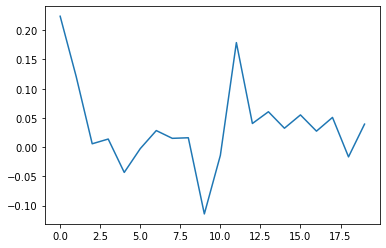

In [11]:
print('diff',sum(list_diff)/len(list_diff))

plt.plot( range(len(list_diff)),list_diff,)